<img src="https://videohive.img.customer.envatousercontent.com/files/9431b98a-d191-4101-ab26-4e7aac1c3e0e/inline_image_preview.jpg?auto=compress%2Cformat&fit=crop&crop=top&max-h=8000&max-w=590&s=0c359dd8c1702b5b8b8a9060e31cec1a">

# Hotel Booking Analysis

## Overview

My name is Muhammad Faris bin Kamaludin. This is the analysis that is required by PETRONAS Digital as part of the pre-interview requirement. A hotel dataset is given for the exercise. After a thorough research, I have found out the details of the dataset. The dataset given is filled with hotel demand data which is acquired from [this paper](https://www.sciencedirect.com/science/article/pii/S2352340918315191). There are two hotels' data in the dataset which is *H1*, a resort hotel and *H2*, a city hotel. Both hotels are located in Portugal, based on the paper. The data contains bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017.

## Q1. Descriptive analytics & insights on the dataset

### Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer


sns.set(rc={'figure.figsize':(11.7,8.27)}, style='darkgrid')

from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option("display.max_columns", 36)


In [2]:
# Extracting the data & have a quick look
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# Find out the number of rows & features in the dataset
df.shape

(119390, 32)

From the number above, the dataset contains 119390 rows of data & 32 features.

In [4]:
# A quick glance on the data's characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Identified numbers of features' data types
df.dtypes.value_counts()

int64      16
object     12
float64     4
dtype: int64

In [6]:
# List out the features in the dataset which are categorical
df.select_dtypes(include=['object']).columns.to_list()

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [7]:
# List out the features in the dataset which are numerical
df.select_dtypes(include=['int64', 'float64']).columns.to_list()

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

Based on the output above, we understand that the dataset contains 12 categorical features & 20 numerical features for us to use in analysis later. 

### Filling missing values

In [8]:
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

There are 4 features have missing values in the dataset, which is *company*, *agent*, *country*, *children* columns

<AxesSubplot:xlabel='children', ylabel='Count'>

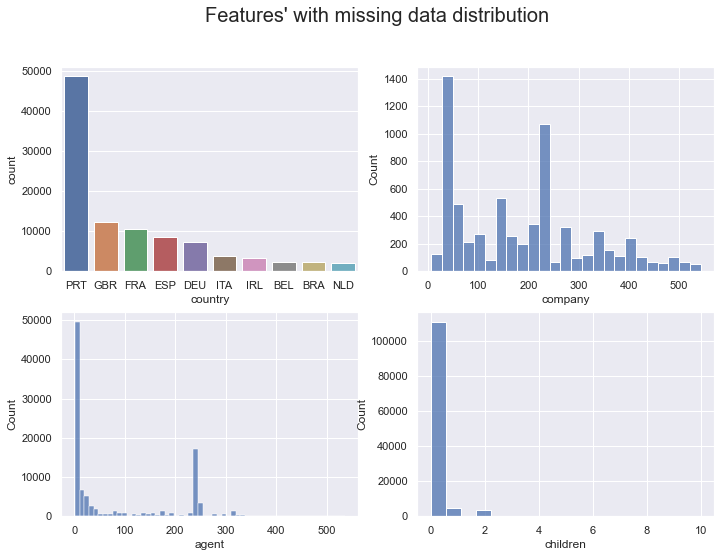

In [9]:
# Check the missing data's distribution
fig, axs = plt.subplots(2, 2)

plt.suptitle("Features' with missing data distribution", fontsize=20)

sns.countplot(df['country'], order=df.country.value_counts().iloc[:10].index, ax=axs[0, 0])
sns.histplot(df['company'], ax=axs[0, 1])
sns.histplot(df['agent'], ax=axs[1, 0])
sns.histplot(df['children'], ax=axs[1, 1])

In [10]:
# Create copy for the dataframe prior made changes to it
df_clean = df.copy()

In [11]:
# Identified percentage of missing data in each feature
missing_column = ['country', 'company', 'agent', 'children']

print("Missing values ratio: ")

for i in missing_column:
    missing = (df[i].isna().sum() / len(df[i])) * 100
    print(f"{i}: {missing:.4f}%")

Missing values ratio: 
country: 0.4087%
company: 94.3069%
agent: 13.6862%
children: 0.0034%


In [12]:
# Replace missing values

df_clean['children'].fillna(0, inplace=True)
df_clean['country'].fillna('Unspecified', inplace=True)
df_clean['agent'].fillna(0, inplace=True)

# standardized meal column  of 'Undefined' to 'SC'
df_clean['meal'].replace('Undefined', 'SC', inplace=True)

# Drop company column
df_clean.drop(['company'], axis=1, inplace=True)

From the output above, I understand that company column suffered the most missing data with almost ~95%. That is too much to be just be filled with statistical value from the feature's column. I have decided to just drop the *company* column and filled *children* and *agent* columns with its mode, which is zero. Moreover, I also filled the missing values from *country* column with **Unspecified** value since we do not know the origin of these travellers. 

In [13]:
# Dropping rows with no real guests (zero adults, zero children, zero infants)

zero_guests = list(df_clean.loc[df_clean["adults"]
                   + df_clean["children"]
                   + df_clean["babies"] == 0].index)
df_clean.drop(df_clean.index[zero_guests], inplace=True)


In [14]:
print(f"Number of rows before dropping: {len(df)}")
print(f"Number of rows with zero guests: {len(zero_guests)}")
print(f"Number of rows after dropping: {len(df_clean)}")

Number of rows before dropping: 119390
Number of rows with zero guests: 180
Number of rows after dropping: 119210


### Feature Engineering

In [15]:
# Create a new feature 'family', 'total_customer' and 'total_nights' columns

def family(data):
    if ((data['adults'] > 0) & (data['children'] > 0)):
        val = 1
    elif ((data['adults'] > 0) & (data['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

def feature(data):
    data["is_family"] = data.apply(family, axis = 1)
    data["total_customer"] = data["adults"] + data["children"] + data["babies"]
    data["total_customer"] = data["total_customer"].astype(int) 
    data["total_nights"] = data["stays_in_weekend_nights"]+ data["stays_in_week_nights"]
    return data

df_clean = feature(df_clean)

## EDA

#### How many repeated guests decided to cancel booking

Percentage of repeated guests who:- 
Cancelled: 14.6471%
Not Cancelled: 85.3529%


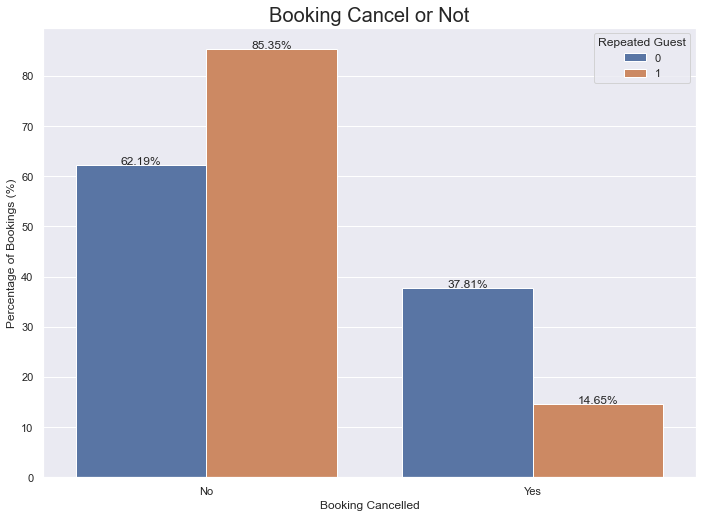

In [16]:
# create percentage from the values
cancel_percentage = (df_clean.groupby(['is_repeated_guest'])['is_canceled']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('is_canceled'))

ax = sns.barplot(data=cancel_percentage, x='is_canceled',
        y='percentage',
        hue='is_repeated_guest')

ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel('Booking Cancelled')
ax.set_ylabel('Percentage of Bookings (%)')

# Set percentage text on top of the bar
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 0.1,
                '{:1.2f}%'.format(height),
                ha="center")

ax.legend(title='Repeated Guest')
ax.set_title('Booking Cancel or Not', fontsize=20)

print("Percentage of repeated guests who:- ")
print(f"Cancelled: {cancel_percentage.loc[cancel_percentage['is_canceled'] == 1, 'percentage'].values[1]:.4f}%")
print(f"Not Cancelled: {cancel_percentage.loc[cancel_percentage['is_canceled'] == 0, 'percentage'].values[1]:.4f}%")

We can pretty much understand that, mostly of the repeated guests tend to not cancel their bookings. About 85% of the repeated guests decided to proceed with their bookings and stayed at the respective hotels. Only ~15% of them cancelled the bookings because of unexpected situations.

In [17]:
# Splitting the hotels to Resort & City Hotel and make sure only real guests who didnt not cancel
# their booking are included

resort = df_clean.loc[(df_clean['hotel'] == 'Resort Hotel') & (df_clean['is_canceled'] == 0)]
city = df_clean.loc[(df_clean['hotel'] == 'City Hotel') & (df_clean['is_canceled'] == 0)]

print("Percentage of guests who didn't cancel their booking and stay at:- ")
print(f"Resort Hotel: {(len(resort) / (len(resort) + len(city))) * 100:.2f}%")
print(f"City Hotel: {(len(city) / (len(resort) + len(city))) * 100:.2f}%")

Percentage of guests who didn't cancel their booking and stay at:- 
Resort Hotel: 38.56%
City Hotel: 61.44%


#### Identified how much guests paid for a night & how the price fluctuated over the year

In [18]:
# Considering only adults and children as paying guests.
resort["adr_pp"] = resort["adr"] / (resort["adults"] + resort["children"])
city["adr_pp"] = city["adr"] / (city["adults"] + city["children"])

# Print the average revenue per person for each hotel 
print("Average cost per person for each hotel per night for at average of all room types:- ")
print(f"Resort Hotel: {resort['adr_pp'].mean():.2f} €")
print(f"City Hotel: {city['adr_pp'].mean():.2f} €")

Average cost per person for each hotel per night for at average of all room types:- 
Resort Hotel: 47.49 €
City Hotel: 59.27 €


Above are the average room costs per night regardless of the meal & room types. It only covers the actual guests who really come & stay at the hotels. It does not include guests who cancelled their booking. Price is in EUR as the hotels are operated in Portugal.

In [19]:
# normalize price per night for the whole dataset & create new dataframe for actual guests:
df_clean["adr_pp"] = df_clean["adr"] / (df_clean["adults"] + df_clean["children"])
present_guests = df_clean.loc[df_clean["is_canceled"] == 0]

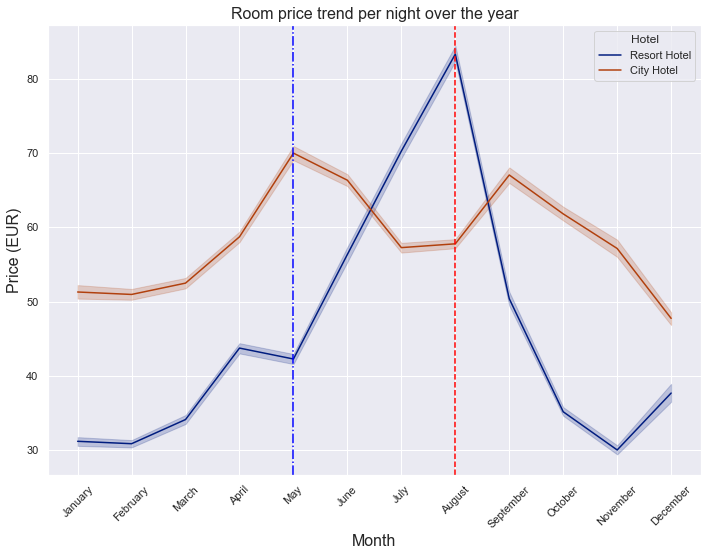

In [20]:
# Extracting room prices based on hotel types
room_prices = present_guests[["hotel", "arrival_date_month", "adr_pp"]]

ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

room_prices["arrival_date_month"] = pd.Categorical(room_prices["arrival_date_month"], 
    categories=ordered_months, 
    ordered=True)

sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices, 
            hue_order = ["Resort Hotel", "City Hotel"], palette="dark")
plt.title("Room price trend per night over the year", fontsize=16)
plt.legend(title="Hotel")
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price (EUR)", fontsize=16)

plt.axvline(x="August", color="red", linestyle="--")
plt.axvline(x="May", color="blue", linestyle="-.")


The graph explained that during summer season (June - September), the price per night at Resort Hotel spiked as people tend to go to beaches. The demand spiked & triggered the price to jack up even more during that time. Moreover, the price at City Hotel peaked in May & September. The vertical line shown the max price for the respective hotels in a year.

#### Finding the difference of average total nights stayed between guests who has family & no family

In [21]:
# Create unique list of hotel types
hotels = sorted(list(df['hotel'].unique()))
hotels


['City Hotel', 'Resort Hotel']

In [22]:
# Color scheme for barbell plot
first_color = '#EE0A1D' #color for representing has family
second_color = '#2901E7' #color for representing has no family
text_color = '#FAF9FF' #color for text inside the circle
line_color = '#000000'

Text(-0.05, 5, 'Average nights stayed based on family')

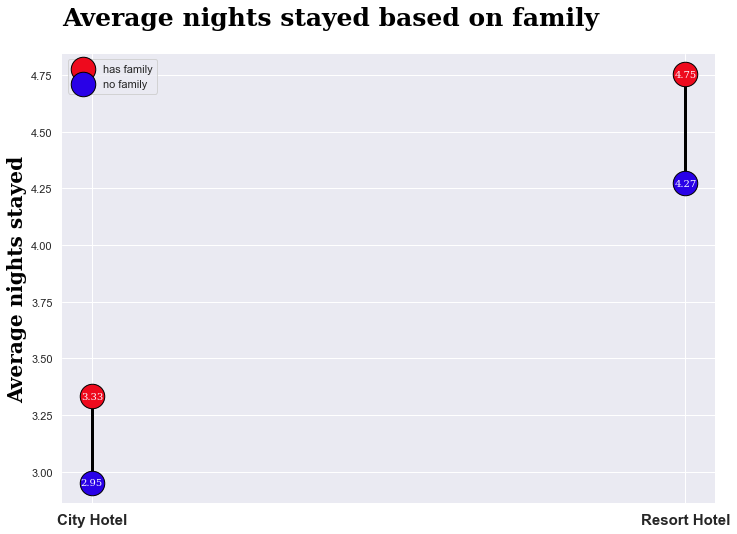

In [23]:
# Create barbell plot to find out the distance between the two groups
fig, ax = plt.subplots()

spines = ['top', 'right', 'left', 'bottom']
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.set_xticklabels(hotels, fontweight='bold', fontsize=15)
ax.set_ylabel('Average nights stayed', color=line_color, fontweight='bold', fontsize=20, fontfamily='serif')

for hotel in hotels:

    average_stays = df_clean[df_clean['hotel'] == hotel].groupby('is_family').agg({'total_nights' : 'mean'}).reset_index().sort_values(by='is_family', axis=0, ascending=False)

    has_family = ax.scatter(hotel, average_stays.iloc[0]['total_nights'], c=first_color, s=600, zorder=3, ec=line_color)
    no_family = ax.scatter(hotel, average_stays.iloc[1]['total_nights'], c=second_color, s=600, zorder=2, ec=line_color)
 
    ax.plot((hotel, hotel), (average_stays.iloc[0]['total_nights'], average_stays.iloc[1]['total_nights']), c=line_color, zorder=1, alpha=1, linewidth=3)
    ax.text(hotel, average_stays.iloc[0]['total_nights'], round(average_stays.iloc[0]['total_nights'], 2), c=text_color, va='center', ha='center', fontsize=10, fontfamily='serif')
    ax.text(hotel, average_stays.iloc[1]['total_nights'], round(average_stays.iloc[1]['total_nights'], 2), c=text_color, va='center', ha='center', fontsize=10, fontfamily='serif')

    
ax.legend([has_family, no_family],['has family', 'no family'], loc='best')

ax.text(-0.05, 5, "Average nights stayed based on family", c='#000000', ha='left', va='center', fontsize=25, fontfamily='serif', fontweight='bold')
    

Based on the graph above, we can understand that guests which came as family, tend to go for longer stay compared to individual / couple. This is totally understandable as family tends to go for longer vacation compared to individual, who some of them potentially just went for short business trip. We also can see that guests favored to stay longer at resort hotel than city hotel.

#### How long people stay at the hotels

In [24]:
# Create dataframe based on total nights stayed by guests at which hotel

resort["total_nights"] = resort["stays_in_weekend_nights"] + resort["stays_in_week_nights"]
city["total_nights"] = city["stays_in_weekend_nights"] + city["stays_in_week_nights"]

no_nights_resort = list(resort["total_nights"].value_counts().index)
no_bookings_resort = list(resort["total_nights"].value_counts())
perct_bookings_resort = resort["total_nights"].value_counts() / sum(no_bookings_resort) * 100 # convert to percent

no_nights_city = list(city["total_nights"].value_counts().index)
no_bookings_city = list(city["total_nights"].value_counts())
perct_bookings_city = city["total_nights"].value_counts() / sum(no_bookings_city) * 100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": no_nights_resort,
                           "rel_num_bookings": perct_bookings_resort})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": no_nights_city,
                           "rel_num_bookings": perct_bookings_city})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

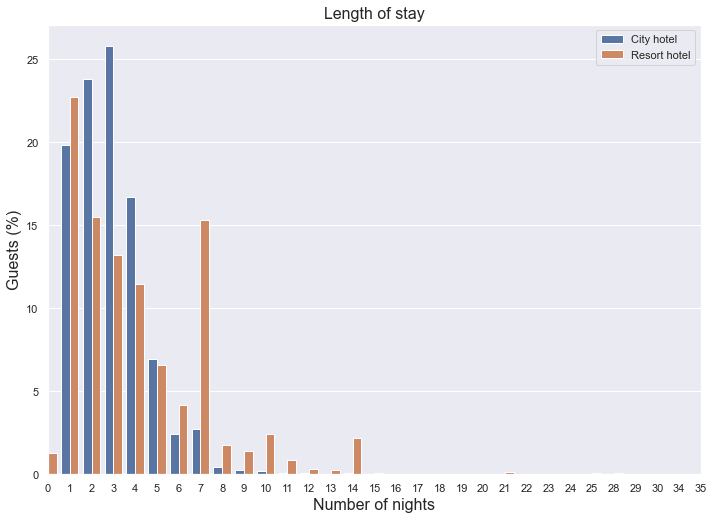

In [25]:
plt.figure()
sns.barplot(x = "num_nights", y = "rel_num_bookings", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.xlim(0, 30)
plt.ylabel("Guests (%)", fontsize=16)
plt.legend(loc="upper right")


Based on the graph above, both resort & city hotel, most of the guests stayed from 1 - 4 nights. However, 7 nights stay can be well liked by the resort hotel's guests as well. Minority of resort hotel's guests also liked to stay in until 14 nights stays.

#### Number of bookings got canceled due to high lead time

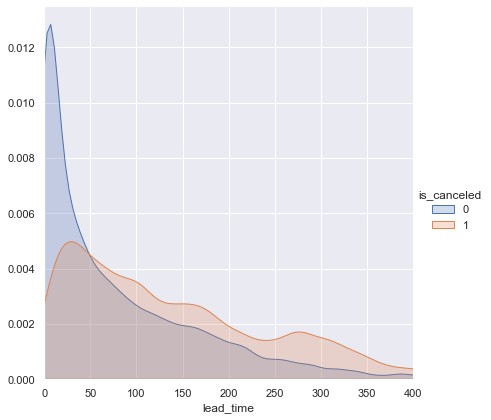

In [26]:
sns.FacetGrid(df_clean, hue = 'is_canceled', height = 6, xlim = (0,400))\
    .map(sns.kdeplot, 'lead_time', shade = True)\
    .add_legend()


It shows that, number of people cancelling their booking is higher than non-canceled when the lead time is higher than 50 days (cancellation rate is higher at this point).

#### Find out the busiest month for hotels

<AxesSubplot:title={'center':'Booking Trend (Monthly)'}, xlabel='Months', ylabel='Booking (%)'>

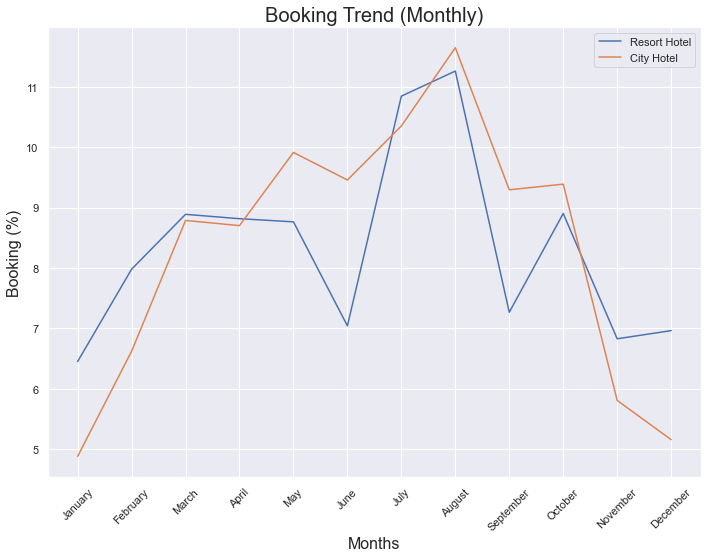

In [27]:
resorts_months = resort.loc[:, 'arrival_date_month'].value_counts().reindex(ordered_months)
city_months = city.loc[:, 'arrival_date_month'].value_counts().reindex(ordered_months)

x1 = resorts_months.index
y1 = resorts_months / resorts_months.sum() * 100 # convert to percent

x2 = city_months.index
y2 = city_months / city_months.sum() * 100 # convert to percent

fig, ax = plt.subplots()

ax.set_xlabel('Months', fontsize=16)
ax.set_ylabel('Booking (%)', fontsize=16)
ax.set_title('Booking Trend (Monthly)', fontsize=20)
plt.xticks(rotation=45)

sns.lineplot(x1, y1.values, label='Resort Hotel', palette='dark')
sns.lineplot(x2, y2.values, label='City Hotel', palette='dark')

From graph above, both hotels are pretty much occupied in summer (June - September) due to holiday season. Bookings are pretty much less during winter season (December - March).

#### Find out the daily price relationship with length of stay

In [28]:
no_nights_resort = resort.loc[:, ['total_nights', 'adr_pp']].groupby('total_nights')\
    .mean().index.to_list()
perct_price_resort = resort.loc[:, ['total_nights', 'adr_pp']].groupby('total_nights')\
    .mean()['adr_pp'].round(2).to_list()

no_nights_city = city.loc[:, ['total_nights', 'adr_pp']].groupby('total_nights')\
    .mean().index.to_list()
perct_price_city = city.loc[:, ['total_nights', 'adr_pp']].groupby('total_nights')\
    .mean()['adr_pp'].round(2).to_list()

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": no_nights_resort,
                           "avg_price": perct_price_resort})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": no_nights_city,
                           "avg_price": perct_price_city})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

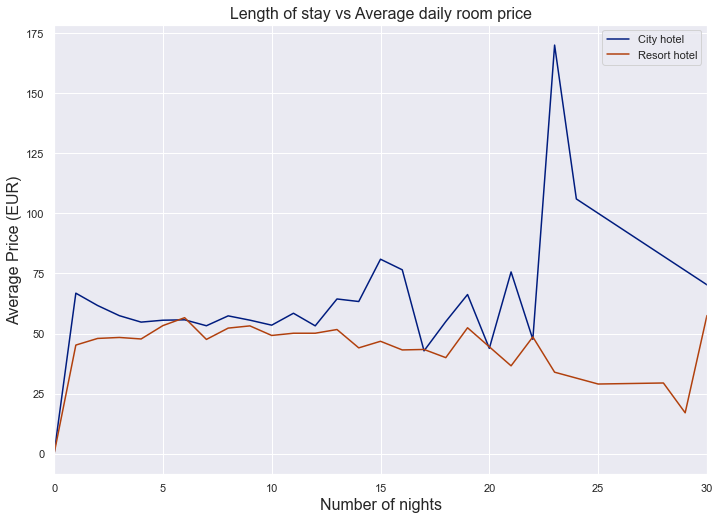

In [29]:
plt.figure()
sns.lineplot(x = "num_nights", y = "avg_price", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"], palette="dark")
plt.title("Length of stay vs Average daily room price", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.xlim(0, 30)
plt.ylabel("Average Price (EUR)", fontsize=16)
plt.legend(loc="upper right")


Average daily price for city hotel spiked at 24 days length of stay. Most of the time, resort hotel daily room price can be considered much cheaper than city hotel daily rate. This may possible due to high land value in the city & high land rental cost which cause the daily room rate to be much expensive. Higher length of stay for resort hotel means cheaper price while city hotel's does not have the same effect.

## Q2. Data science use cases from perspective of the hotel owner


From the perspective of hotel owners, they can implement machine learning subset's unsupervised learning such as clustering. Clustering can pretty much help the hotel owners to identify & cluster their guests to understand their behaviours & spending power of the guests in much details. Imagine that the hotel owners can identify the potential high spenders & understand their spending / stay pattern, they can eventually started their targetted ads campaign or manipulate the room rate price depends on the length of stay pattern at their hotels.

Moreover, they can also use machine learning's logistic regression technique to identify the potential guests which might cancel their booking in future. For example, as graph in previous section shown that, higher lead time more than 50 days triggers most of the guests to cancel their booking. This info can help the owners to plan well & allocate their resources at the right place to improve the productivity of the staffs. Another method of regression is linear regression which also can help the owners to predict high volume of guests in incoming months so that they can prepare much earlier in terms of staffs' volume or even volume of raw food stocks, which can help the owners from unnecessary overspending for high volume of staffs or high volume of food waste.

## Q3. Data science use cases from perspective of the guests

In terms of perspective of the guests, they can perform linear regression as well by predicting the daily room rate so that they can properly plan their trips in future. This will help the guests in saving a lot of money from spending unnecessary on high price daily room rate at the wrong time. The guests can also identify the pattern of volume of other guests as this can assist them to avoid high volume of other guests. Moreover, especially during this pandemic or COVID-19 era, the guests can properly plan their trip and staycation without mingling with other guests too much & avoid the risk to get infected. 

## Q4. Develop a model to predict bookings cancellation and explain the model as well as it's output

#### Find the correleation between the features

<AxesSubplot:>

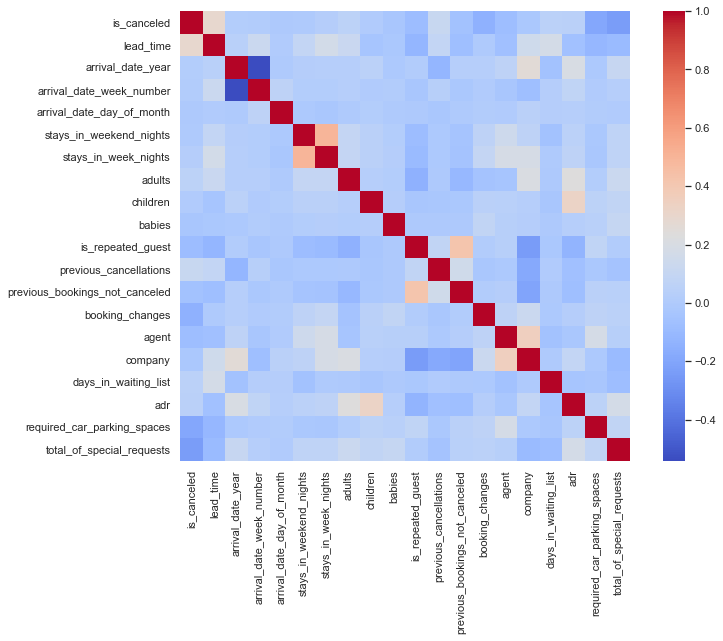

In [30]:
# Check correlation using the original dataframe
corr = df.corr()
sns.heatmap(corr, square=True, cmap='coolwarm')

In [31]:
cancel_corr = df.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

We have identified the 5 important numerical features which is highly correlated with booking cancellation status. They are lead time, special requests, car parking spaces required, booking changes & even number of previous cancellation. The booking changes will be drop because it can be changed over time.

In [32]:
# To identify the associated reservation status with the cancellation status
df.groupby('is_canceled')["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out             75166
1            Canceled              43017
             No-Show                1207
Name: reservation_status, dtype: int64

In [33]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, f1_score, r2_score
import shap
import eli5


In [34]:
# manually choose columns to include
# some columns are excluded to make the model more general and to prevent leakage
# (arrival_date_year, assigned_room_type, booking_changes, reservation_status, country,
# days_in_waiting_list)
# including the country would increase accuracy, but it may also make the model less general

numerical = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

categorical = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

# Separate features and predicted value
features = numerical + categorical
X = df.drop(["is_canceled"], axis=1)[features]
y = df["is_canceled"]

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# preprocess numerical feats:
# for most num cols, except the dates, 0 is the most logical choice as fill value
# and here no dates are missing.
num_transformer = SimpleImputer(strategy="constant")

# Preprocessing for categorical features:
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical features:
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, numerical),
                                              ("cat", cat_transformer, categorical)])

In [35]:
# define models to test:
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]

model_performance = {}

# Preprocessing, fitting, making predictions and scoring for every model:
for name, model in base_models:
    # pack preprocessing of data and the model in a pipeline:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

    model_steps.fit(X_train, y_train)
    y_pred = model_steps.predict(X_test)
    
    model_f1_score = round(f1_score(y_test, y_pred, average="weighted"), 4)

    # add model performance to dictionary:
    model_performance[name] = model_f1_score



/Users/faris/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[21:45:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
print("F1 Score values for each models:")
for i in model_performance:
    print(f"{i}: {model_performance[i]}")

F1 Score values for each models:
DT_model: 0.8215
RF_model: 0.8623
LR_model: 0.7811
XGB_model: 0.8412


In [37]:
# RF model after random tuning hyperparameters :
rf_model = RandomForestClassifier(n_estimators=160,
                               max_features=0.4,
                               min_samples_split=2,
                               n_jobs=-1,
                               random_state=0)

model_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model)])

model_pipe.fit(X_train, y_train)
y_pred = model_pipe.predict(X_test)

model_f1_score = round(f1_score(y_test, y_pred, average="weighted"), 4)

print(f"F1 Score for RF model: {model_f1_score}")


F1 Score for RF model: 0.8651


In [38]:
# Names of all (encoded) features are needed.
# Get names of columns from One Hot Encoding:
onehot_columns = list(model_pipe.named_steps['preprocessor'].
                      named_transformers_['cat'].
                      named_steps['onehot'].
                      get_feature_names(input_features=categorical))

# Add num_features for full list.
# Order must be as in definition of X, where num_features are first: 
feat_imp_list = numerical + onehot_columns

# show 10 most important features, provide names of features:
feat_imp_df = eli5.formatters.as_dataframe.explain_weights_df(
    model_pipe.named_steps['model'],
    feature_names=feat_imp_list)


In [39]:
feat_imp_df.head(10)

,feature,weight,std
0,lead_time,0.143413,0.014738
1,deposit_type_Non Refund,0.132847,0.110055
2,adr,0.095444,0.004118
3,deposit_type_No Deposit,0.086032,0.106844
4,arrival_date_day_of_month,0.069602,0.002306
5,arrival_date_week_number,0.054540,0.002246
6,total_of_special_requests,0.050384,0.014383
7,agent,0.043701,0.007353
8,stays_in_week_nights,0.041340,0.002036
9,previous_cancellations,0.038880,0.013721


From the table above, we can find out that the top 3 are the most important features, which is lead time, deposit type and ADR. The lead time feature bear the heaviest weight in determining either the booking got cancelled or not.

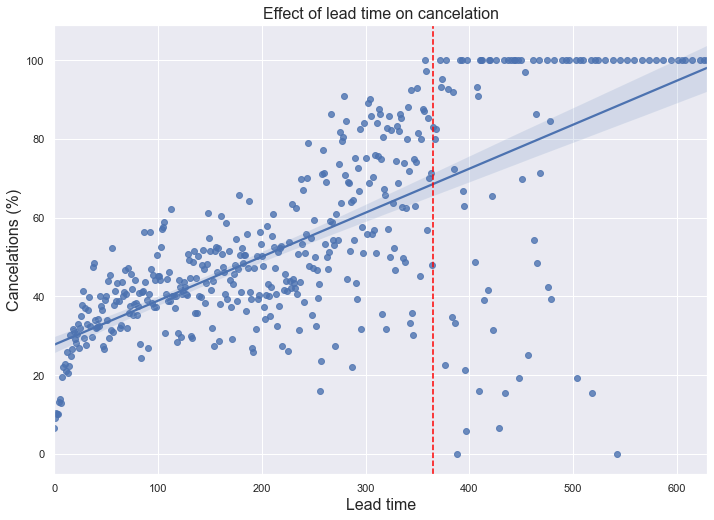

In [40]:
# group data for lead_time:
lead_cancel_data = df_clean.groupby("lead_time")["is_canceled"].describe()

# use only lead_times wih more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

plt.figure()
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations (%)", fontsize=16)
plt.axvline(x=365, color="red", linestyle="--")

The vertical line indicates the 365 days, one whole year. As it is clearly can be seen that the model inidicates that the bookings rarely got cancelled if the lead time is below 365 days. While most of the bookings got cancelled after the lead time reached more than 1 year.